In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn import metrics
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import numpy as np 
import pandas as pd 
import re 
import nltk 
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import string
import matplotlib
import string



In [420]:
df = pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes").drop('Unnamed: 0',axis=1)

In [421]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [422]:
df.size

13725

In [423]:
df.shape

(1525, 9)

In [424]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [426]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [427]:
for column in df[['vote', 'gender']]:
    print(column.upper(),':',df[column].nunique())
    print(df[column].value_counts())
    print('\n*************************************************\n')
    print(df[column].value_counts(normalize=True))
    print('\n*************************************************\n')


VOTE : 2
Labour          1063
Conservative     462
Name: vote, dtype: int64

*************************************************

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

*************************************************

GENDER : 2
female    812
male      713
Name: gender, dtype: int64

*************************************************

female    0.532459
male      0.467541
Name: gender, dtype: float64

*************************************************



In [428]:
df.duplicated().sum()
print(df.shape)
df.drop_duplicates(inplace=True)
df.duplicated().sum()
print(df.shape)

(1525, 9)
(1517, 9)


In [429]:
def uni_var_analysis(column,nbins):
    print('Description of '+ column)
    print('---------------------------------------------------------')
    print(df[column].describe(),end=' ')
    print('')
    print('')
       
    print('---------------------------------------------------------')
    print('Histogram of ' + column)
    sns.histplot(df[column]);
    plt.show()
    
    plt.figure()
    print('Boxplot of ' + column)
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of age
---------------------------------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 

---------------------------------------------------------
Histogram of age


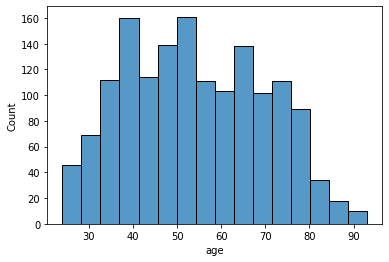

Boxplot of age


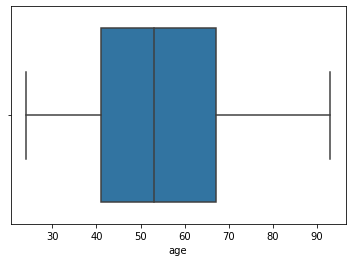

Description of economic.cond.national
---------------------------------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64 

---------------------------------------------------------
Histogram of economic.cond.national


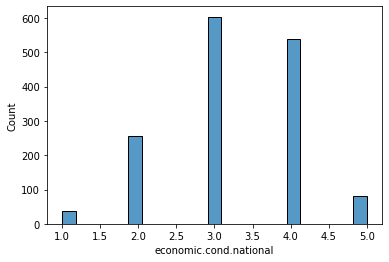

Boxplot of economic.cond.national


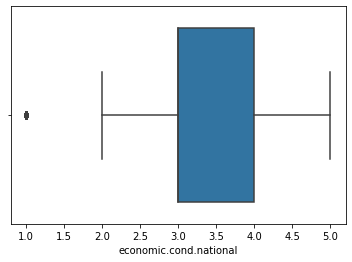

Description of economic.cond.household
---------------------------------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64 

---------------------------------------------------------
Histogram of economic.cond.household


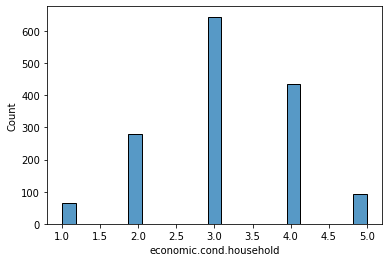

Boxplot of economic.cond.household


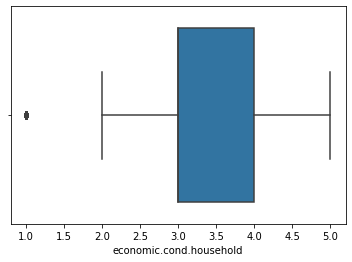

Description of Blair
---------------------------------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 

---------------------------------------------------------
Histogram of Blair


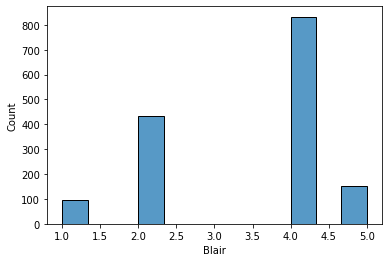

Boxplot of Blair


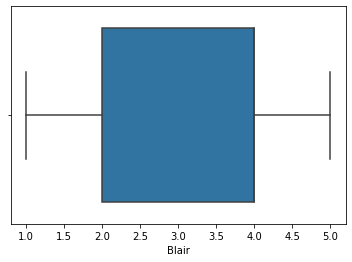

Description of Hague
---------------------------------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 

---------------------------------------------------------
Histogram of Hague


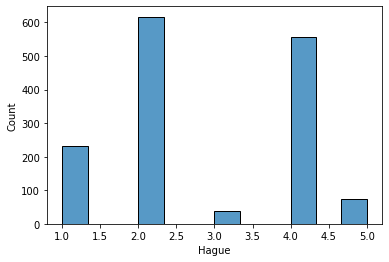

Boxplot of Hague


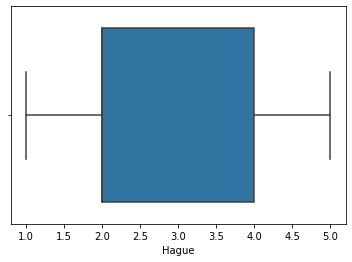

Description of Europe
---------------------------------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 

---------------------------------------------------------
Histogram of Europe


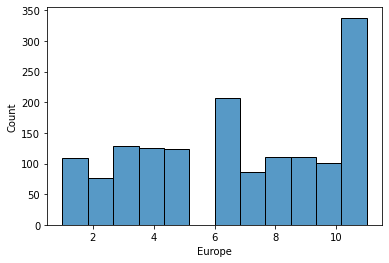

Boxplot of Europe


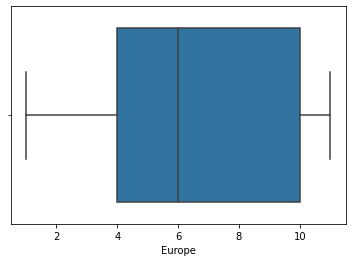

Description of political.knowledge
---------------------------------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64 

---------------------------------------------------------
Histogram of political.knowledge


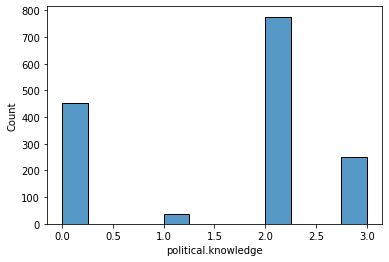

Boxplot of political.knowledge


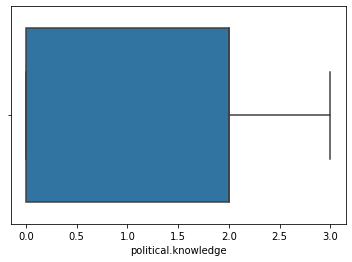

In [431]:
for x in numeric:
    uni_var_analysis(x,20)

In [402]:
categ=[]
numeric=[]
for i in df.columns:
    if df[i].dtype=="object":
        categ.append(i)
    else:
        numeric.append(i)
print(categ) 
print(numeric)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


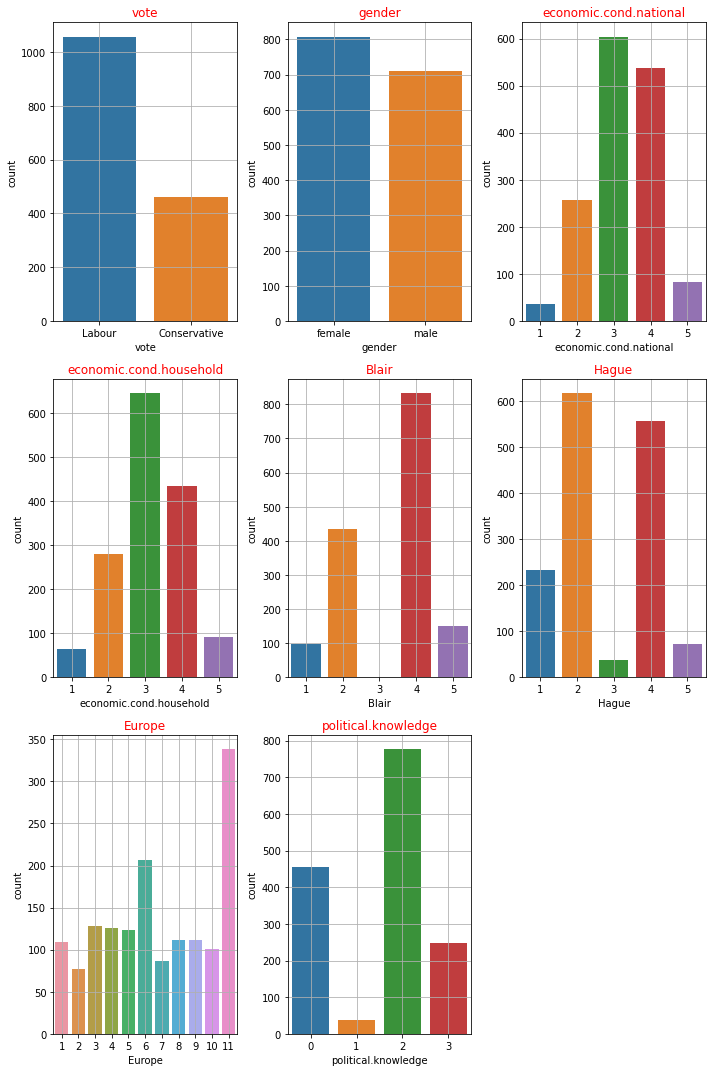

In [432]:
data_plot=df[['vote', 'gender','economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']]
fig=plt.figure(figsize=(10,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

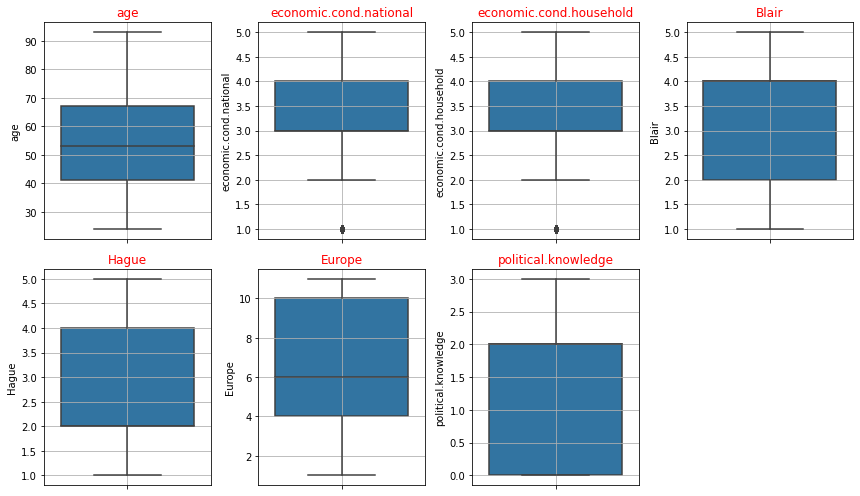

In [433]:
data_plot=df[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

In [434]:
feature_list = df.columns

In [435]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [436]:
for i in feature_list: 
    if df[i].dtype != 'object':
        LL, UL = remove_outlier(df[i])
        df[i] = np.where(df[i] > UL, UL, df[i])
        df[i] = np.where(df[i] < LL, LL, df[i])

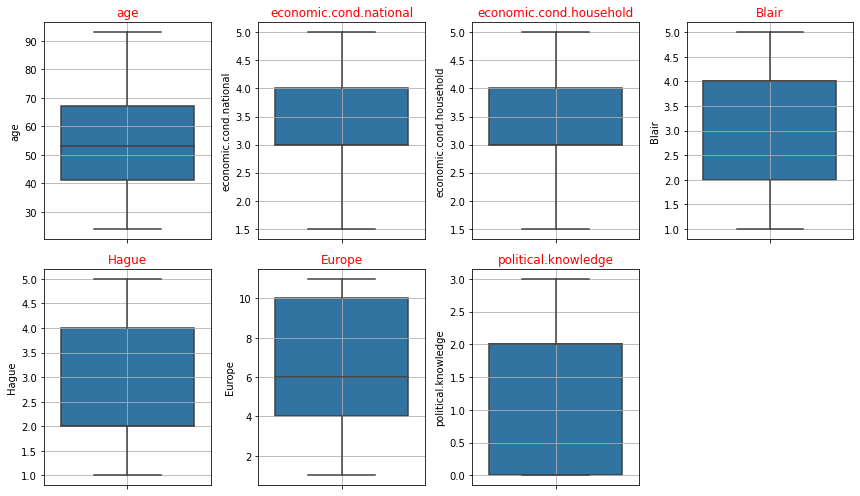

In [437]:
data_plot=df[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Red')
    plt.grid()
plt.tight_layout()
plt.show()

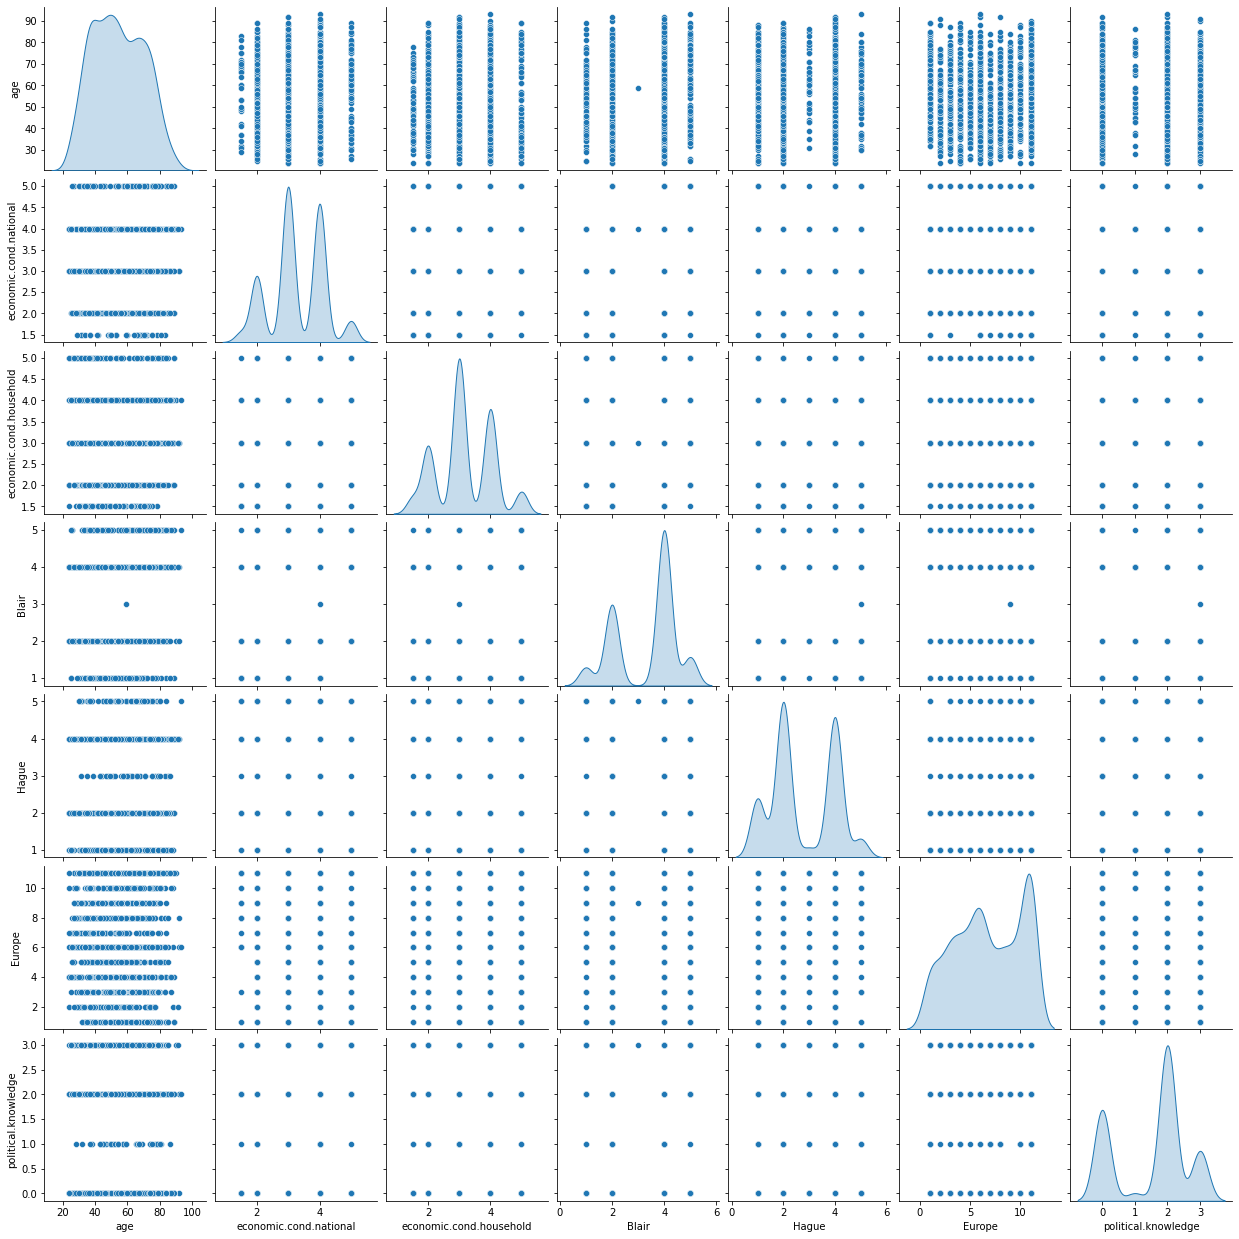

In [438]:
df_attr = (df[numeric])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

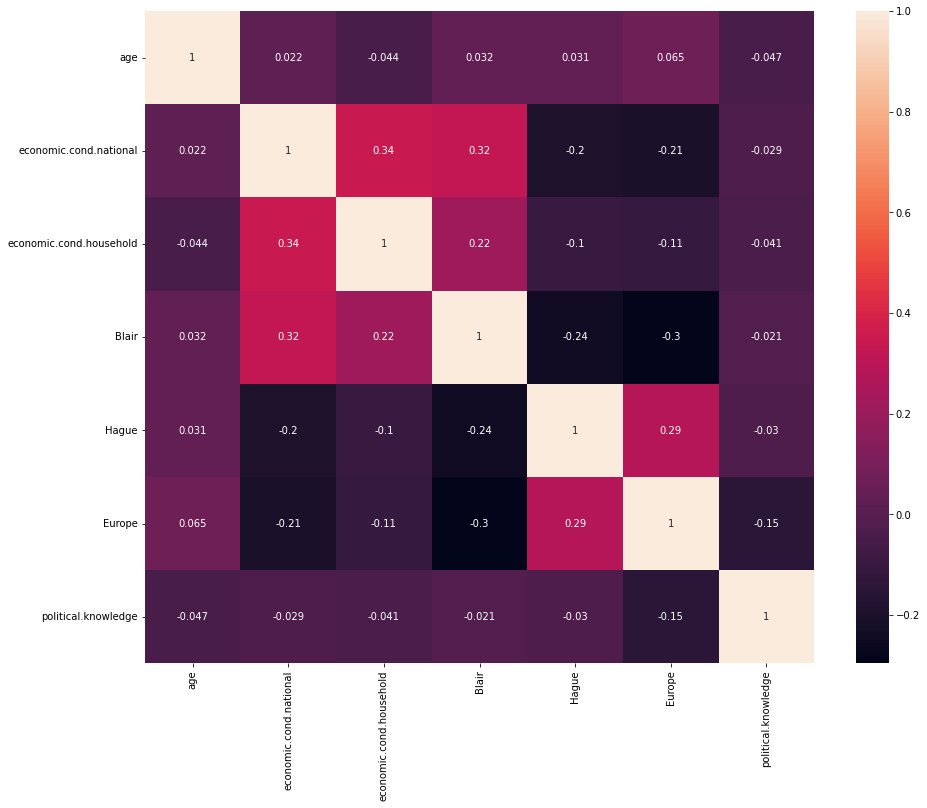

In [439]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [411]:
df.skew()

age                        0.139800
economic.cond.national    -0.069946
economic.cond.household    0.091833
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

In [412]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        df[feature]= label_encoder.fit_transform(df[feature])
        print(df[feature].unique())



feature: vote
[1 0]


feature: gender
[0 1]


In [413]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   int32  
 1   age                      1517 non-null   float64
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   float64
 5   Hague                    1517 non-null   float64
 6   Europe                   1517 non-null   float64
 7   political.knowledge      1517 non-null   float64
 8   gender                   1517 non-null   int32  
dtypes: float64(7), int32(2)
memory usage: 139.0 KB


In [415]:
X = df.drop('vote', axis=1)
y = df['vote']

In [417]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [418]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='sag',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 534 epochs took 1 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none', solver='sag',
                   verbose=True)

In [176]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [177]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.431436,0.568564
1,0.158013,0.841987
2,0.005290,0.994710
3,0.852039,0.147961
4,0.061945,0.938055


In [178]:
model_score = model.score(X_train, y_train)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.8341187558906692


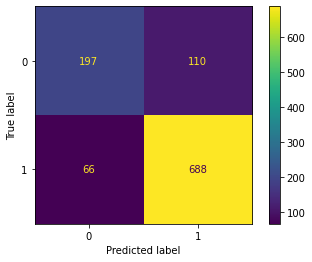

In [179]:
plot_confusion_matrix(model,X_train,y_train);

In [180]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



AUC: 0.890


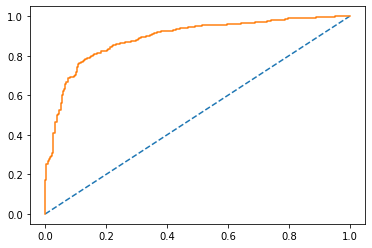

In [181]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [182]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.8267543859649122


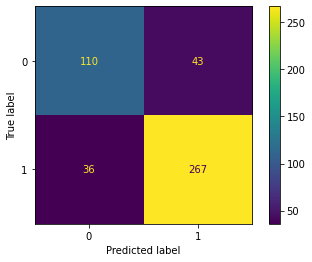

In [183]:
plot_confusion_matrix(model,X_test,y_test);

In [184]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC: 0.877


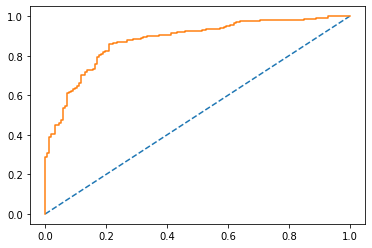

In [185]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [186]:
grid={'penalty':['l2','none'],'solver':['sag','lbfgs','newton-cg','saga'],'tol':[0.0001,0.00001]}

In [187]:
model_logistic = LogisticRegression(max_iter=10000,n_jobs=-1)

In [188]:
grid_search_lr = GridSearchCV(estimator = model_logistic, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [189]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [190]:
print(grid_search_lr.best_params_,'\n')
print(grid_search_lr.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=-1, solver='sag', tol=1e-05)


In [191]:
best_model_lr = grid_search_lr.best_estimator_

In [192]:
ytrain_predict = best_model_lr.predict(X_train)
ytest_predict = best_model_lr.predict(X_test)

In [193]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.424470,0.575530
1,0.151096,0.848904
2,0.007167,0.992833
3,0.834979,0.165021
4,0.069242,0.930758


In [194]:
model_score = best_model_lr.score(X_train, y_train)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.8322337417530632


              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



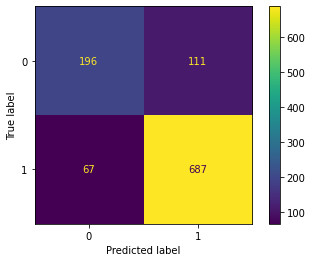

In [195]:
plot_confusion_matrix(best_model_lr,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

AUC: 0.890


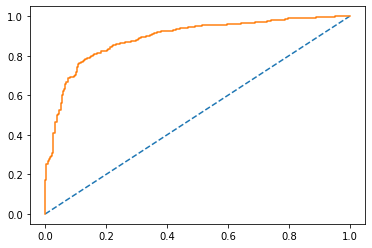

In [196]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [197]:
model_score = best_model_lr.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.8267543859649122


              precision    recall  f1-score   support

           0       0.75      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



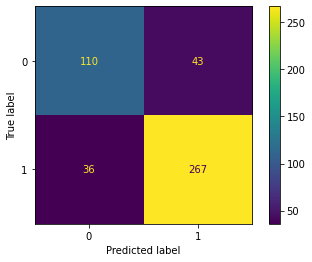

In [198]:
plot_confusion_matrix(best_model_lr,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.877


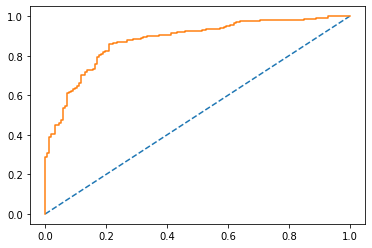

In [199]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [200]:
#Build LDA Model and fit the data
clf = LinearDiscriminantAnalysis()
model = clf.fit(X_train,y_train)

In [201]:
# Training Data Class Prediction with a cut-off value of 0.5 as default
pred_train = model.predict(X_train)
# Test Data Class Prediction with a cut-off value of 0.5 as default
pred_test = model.predict(X_test)

In [202]:
model_score = model.score(X_train, y_train)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.8341187558906692


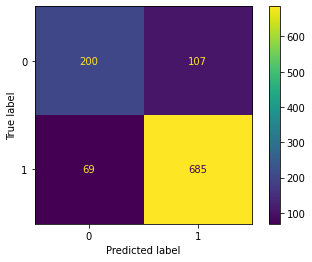

In [203]:
plot_confusion_matrix(model,X_train,y_train);

In [204]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.79      1061
weighted avg       0.83      0.83      0.83      1061



AUC: 0.889


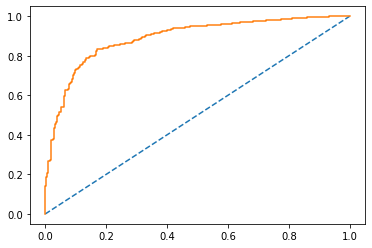

In [205]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [206]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.8333333333333334


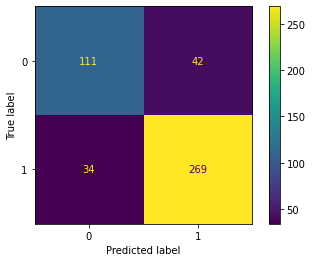

In [207]:
plot_confusion_matrix(model,X_test,y_test);

AUC: 0.888


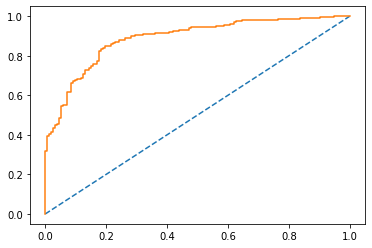

In [208]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [209]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [210]:
print(pred_prob_train)

[[0.94921647 0.05078353]
 [0.07824062 0.92175938]
 [0.30738873 0.69261127]
 ...
 [0.22088844 0.77911156]
 [0.20838927 0.79161073]
 [0.01886825 0.98113175]]


In [211]:
print(pred_prob_test)

[[0.46209267 0.53790733]
 [0.13395475 0.86604525]
 [0.00641425 0.99358575]
 [0.86121034 0.13878966]
 [0.05654455 0.94345545]
 [0.04260503 0.95739497]
 [0.39449714 0.60550286]
 [0.20864986 0.79135014]
 [0.03796689 0.96203311]
 [0.13580378 0.86419622]
 [0.15228401 0.84771599]
 [0.60000771 0.39999229]
 [0.00720252 0.99279748]
 [0.67549318 0.32450682]
 [0.17754135 0.82245865]
 [0.46581547 0.53418453]
 [0.05639667 0.94360333]
 [0.03775112 0.96224888]
 [0.92225579 0.07774421]
 [0.27995632 0.72004368]
 [0.0741405  0.9258595 ]
 [0.76463828 0.23536172]
 [0.79302896 0.20697104]
 [0.5371519  0.4628481 ]
 [0.03997708 0.96002292]
 [0.25385683 0.74614317]
 [0.01126263 0.98873737]
 [0.0099175  0.9900825 ]
 [0.31615707 0.68384293]
 [0.90773029 0.09226971]
 [0.00668077 0.99331923]
 [0.68164081 0.31835919]
 [0.96298278 0.03701722]
 [0.05940894 0.94059106]
 [0.57496138 0.42503862]
 [0.52069624 0.47930376]
 [0.39878848 0.60121152]
 [0.02372618 0.97627382]
 [0.95018055 0.04981945]
 [0.0274685  0.9725315 ]


### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [212]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [213]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [214]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8350612629594723
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [215]:
NB_model.score(X_train, y_train)

0.8350612629594723

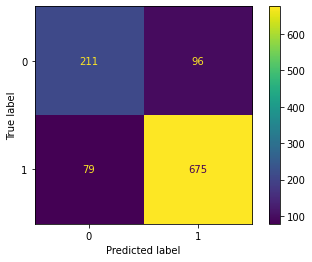

In [216]:
plot_confusion_matrix(NB_model,X_train,y_train);

AUC: 0.889


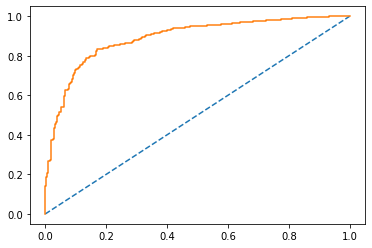

In [217]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [218]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [219]:
NB_model.score(X_test, y_test)

0.8223684210526315

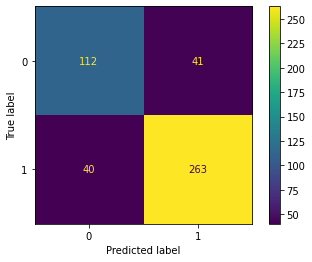

In [220]:
plot_confusion_matrix(NB_model,X_test, y_test);

AUC: 0.888


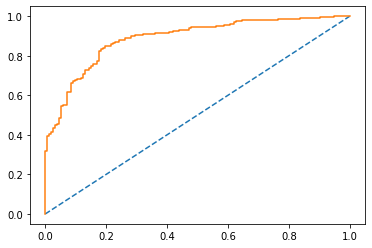

In [221]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

## KNN Model

In [222]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [223]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8557964184731386
[[209  98]
 [ 55 699]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.80      0.82      1061
weighted avg       0.85      0.86      0.85      1061



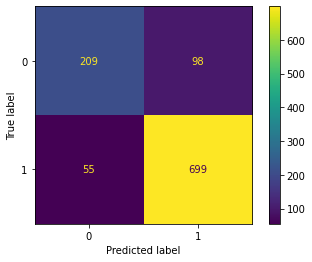

In [224]:
plot_confusion_matrix(KNN_model,X_train,y_train);

AUC: 0.889


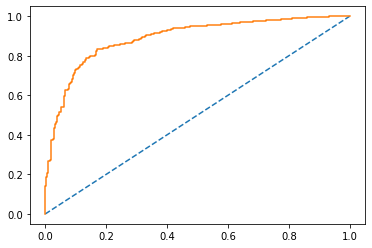

In [225]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [226]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8245614035087719
[[101  52]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



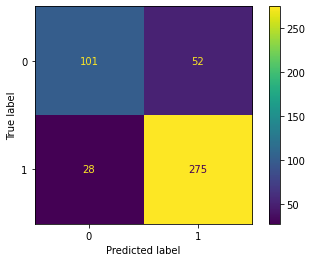

In [227]:
plot_confusion_matrix(KNN_model,X_test, y_test);

AUC: 0.888


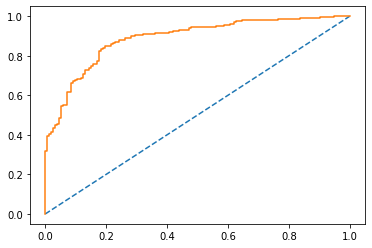

In [228]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

**Default value n_neighbors=5, lets check the performance for K=7**

In [229]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model_1=KNeighborsClassifier(n_neighbors=7)
KNN_model_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [230]:
## Performance Matrix on train data set
y_train_predict = KNN_model_1.predict(X_train)
model_score = KNN_model_1.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8444863336475024
[[203 104]
 [ 61 693]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       307
           1       0.87      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



AUC: 0.889


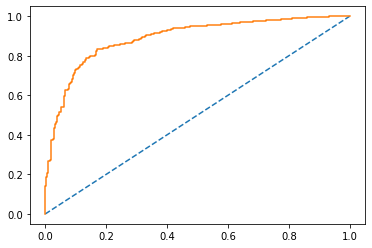

In [231]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [232]:
## Performance Matrix on test data set
y_test_predict = KNN_model_1.predict(X_test)
model_score = KNN_model_1.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[100  53]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456



AUC: 0.888


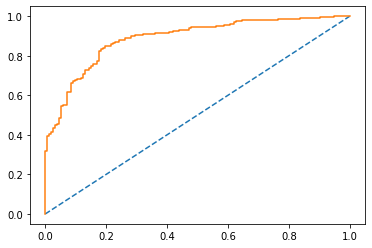

In [233]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

### Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

### Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [234]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2149122807017544,
 0.21052631578947367,
 0.17543859649122806,
 0.17324561403508776,
 0.19298245614035092,
 0.19736842105263153,
 0.19517543859649122,
 0.19956140350877194,
 0.19736842105263153,
 0.19517543859649122]

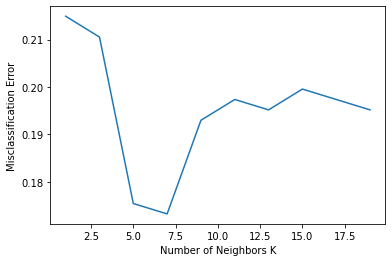

In [235]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### For K = 7 it is giving the best test accuracy lets check train and test for K=7 with other evaluation metrics

In [236]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model_7=KNeighborsClassifier(n_neighbors=7)
KNN_model_7.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [237]:
## Performance Matrix on train data set
y_train_predict = KNN_model_7.predict(X_train)
model_score = KNN_model_7.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8444863336475024
[[203 104]
 [ 61 693]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       307
           1       0.87      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



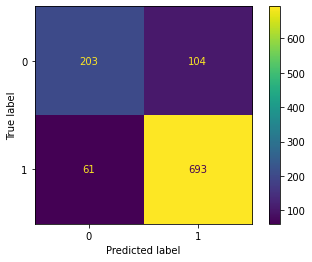

In [238]:
plot_confusion_matrix(KNN_model_7,X_train,y_train);

AUC: 0.889


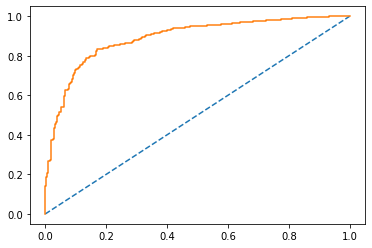

In [239]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [240]:
## Performance Matrix on test data set
y_test_predict = KNN_model_7.predict(X_test)
model_score = KNN_model_7.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8267543859649122
[[100  53]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456



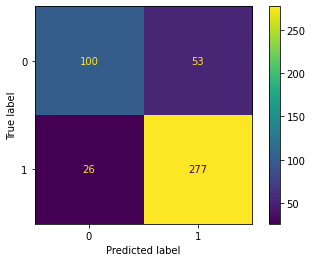

In [241]:
plot_confusion_matrix(KNN_model_7,X_test, y_test);

AUC: 0.888


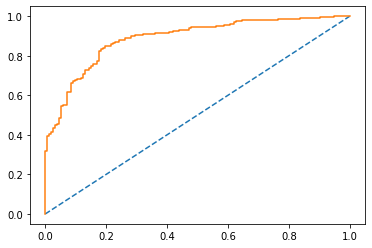

In [242]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

## Random Forest

In [243]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [244]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



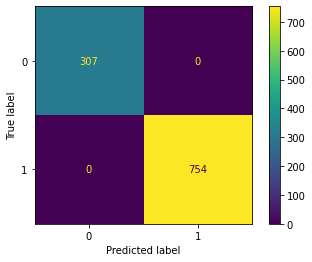

In [245]:
plot_confusion_matrix(RF_model,X_train, y_train);

AUC: 0.889


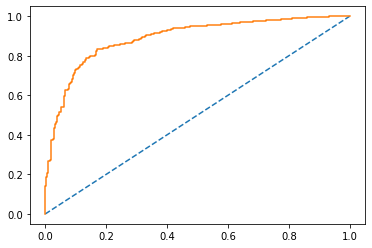

In [246]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [247]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



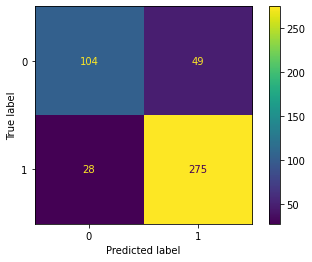

In [248]:
plot_confusion_matrix(RF_model,X_test, y_test);

AUC: 0.888


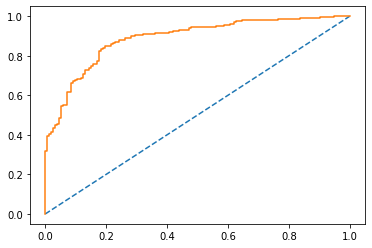

In [249]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

## Random Forest with Grid SearchCV

In [250]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4,5,6],
    'max_features': [4,5],
    'min_samples_leaf': [5,9],
    'min_samples_split': [45,50,60],
    'n_estimators': [200,300,400]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [251]:
grid_search.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [4, 5],
                         'min_samples_leaf': [5, 9],
                         'min_samples_split': [45, 50, 60],
                         'n_estimators': [200, 300, 400]})

In [252]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 45,
 'n_estimators': 200}

In [253]:
best_grid_rf = grid_search.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=5,
                       min_samples_split=45, n_estimators=200, random_state=0)

In [254]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

In [255]:
confusion_matrix(y_train,ytrain_predict_rf)

array([[213,  94],
       [ 58, 696]], dtype=int64)

In [256]:
rf_train_acc=best_grid_rf.score(X_train,y_train) 
rf_train_acc

0.8567389255419415

In [257]:
print(classification_report(y_train,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



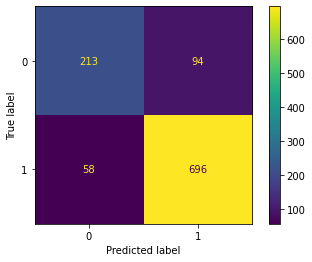

In [258]:
plot_confusion_matrix(best_grid_rf,X_train, y_train);

AUC: 0.889


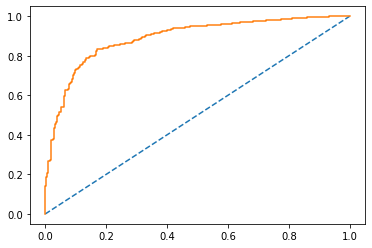

In [259]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [260]:
confusion_matrix(y_test,ytest_predict)

array([[110,  43],
       [ 36, 267]], dtype=int64)

In [261]:
rf_test_acc=best_grid_rf.score(X_test,y_test)
rf_test_acc

0.8377192982456141

In [262]:
print(classification_report(y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456



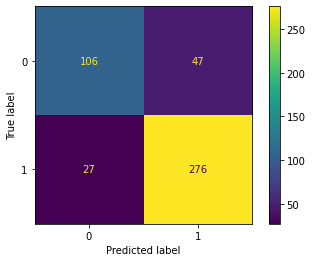

In [263]:
plot_confusion_matrix(best_grid_rf,X_test, y_test);

AUC: 0.888


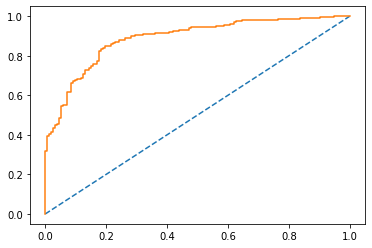

In [264]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [265]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
Bagging_RF_model=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=Bagging_RF_model,n_estimators=500,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=500,
                  random_state=1)

In [266]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9698397737983034
[[279  28]
 [  4 750]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



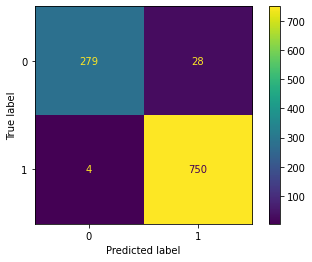

In [267]:
plot_confusion_matrix(Bagging_model,X_train, y_train);

AUC: 0.889


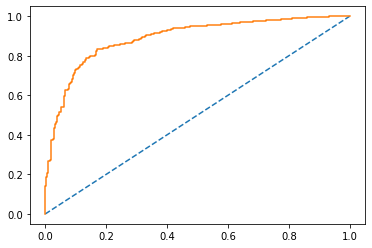

In [268]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [269]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



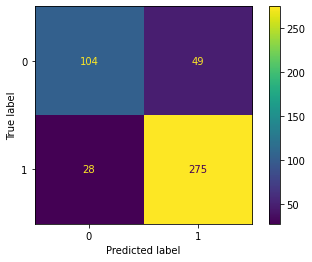

In [270]:
plot_confusion_matrix(Bagging_model,X_test, y_test);

AUC: 0.888


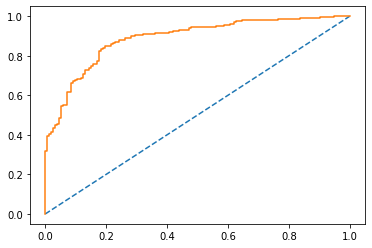

In [271]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

## Ada Boost

In [272]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [273]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



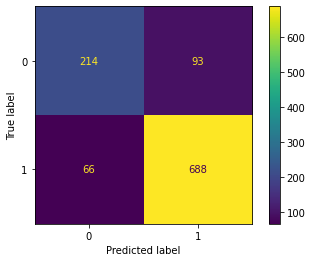

In [274]:
plot_confusion_matrix(ADB_model,X_train, y_train);

AUC: 0.889


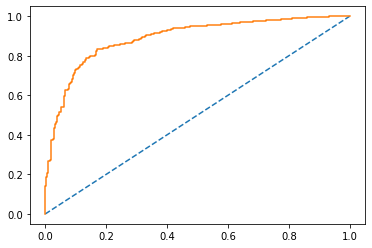

In [275]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [276]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



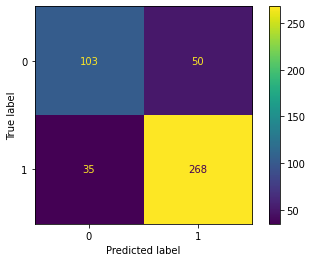

In [277]:
plot_confusion_matrix(ADB_model,X_test, y_test);

AUC: 0.888


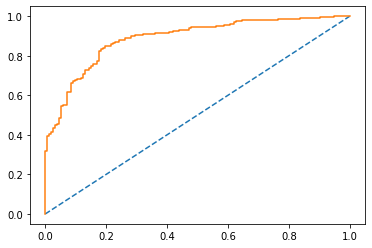

In [278]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

## Gradient Boosting

In [279]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=100,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [280]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



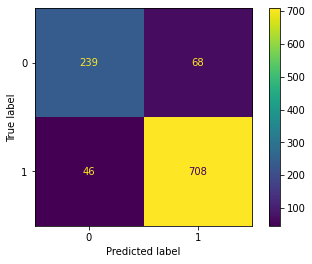

In [281]:
plot_confusion_matrix(gbcl,X_train, y_train);

AUC: 0.889


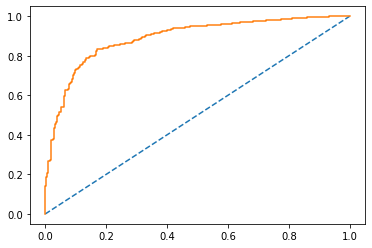

In [282]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [283]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



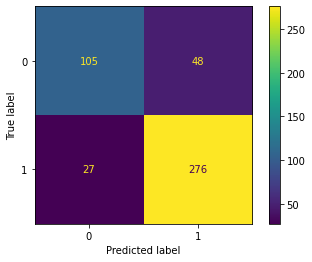

In [284]:
plot_confusion_matrix(gbcl,X_test, y_test);

AUC: 0.888


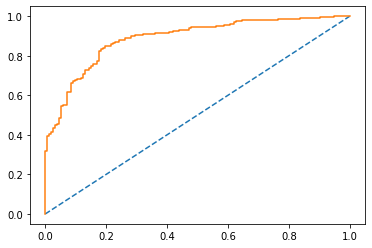

In [285]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.show()

In [286]:
import nltk
nltk.download('inaugural')
nltk.download('stopwords')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to C:\Users\Vinit
[nltk_data]     IITian\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Vinit
[nltk_data]     IITian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [287]:
# Total Number of Characters in Each file
Total_Char_Num_Roosevelt = len(Roosevelt)
print("Number of Characters in Roosevelt file is: ",Total_Char_Num_Roosevelt)

Total_Char_Num_Kennedy = len(Kennedy)
print("Number of Characters in Kennedy file is: ",Total_Char_Num_Kennedy)

Total_Char_Num_Nixon = len(Nixon)
print("Number of Characters in Nixon file is: ",Total_Char_Num_Nixon)

Number of Characters in Roosevelt file is:  7571
Number of Characters in Kennedy file is:  7618
Number of Characters in Nixon file is:  9991


In [288]:
# Total Number of Words in Each file
words_Roosevelt = Roosevelt.split()
print("Number of words in Roosevelt speech",len(words_Roosevelt))

words_Kennedy = Kennedy.split()
print("Number of words in Kennedy speech",len(words_Kennedy))

words_Nixon = Nixon.split()
print("Number of words in Nixon speech",len(words_Nixon))

Number of words in Roosevelt speech 1360
Number of words in Kennedy speech 1390
Number of words in Nixon speech 1819


In [289]:
Roosevelt_Sentence  = pd.DataFrame({'Text':Roosevelt},index=[0])
Roosevelt_Sentence['Sentences']=Roosevelt_Sentence['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('?') or x.endswith('.') or x.endswith('!')]))
print("Number of sentence in Roosevelt speech",Roosevelt_Sentence['Sentences'][0])

Kennedy_Sentence  = pd.DataFrame({'Text':Kennedy},index=[0])
Kennedy_Sentence['Sentences']=Kennedy_Sentence['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('?') or x.endswith('.') or x.endswith('!')]))
print("Number of sentence in Kennedy speech",Kennedy_Sentence['Sentences'][0])

Nixon_Sentence  = pd.DataFrame({'Text':Nixon},index=[0])
Nixon_Sentence['Sentences']=Nixon_Sentence['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('?') or x.endswith('.') or x.endswith('!')]))
print("Number of sentence in Nixon speech",Nixon_Sentence['Sentences'][0])

Number of sentence in Roosevelt speech 67
Number of sentence in Kennedy speech 54
Number of sentence in Nixon speech 71


In [292]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
#from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower casse
#all_words = (w.lower() for w in Roosevelt.words()) 
all_words_Roosevelt = [x.lower() for x in Roosevelt.split()]
print("Number of words in Roosevelt speech before stopwords treatment",len(all_words_Roosevelt))


# Only keeping the words which are not the 'stopwords'
all_words_clean_Roosevelt = [word for word in all_words_Roosevelt if word not in stopwords]
print("Number of words in Roosevelt speech after stopwords treatment",len(all_words_clean_Roosevelt))


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq_Roosevelt = nltk.FreqDist(all_words_clean_Roosevelt)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features_Roosevelt = [item[0] for item in all_words_freq_Roosevelt.most_common(1500)]

print("-------------------------------------XX--------------------------------")

all_words_Kennedy = [x.lower() for x in Kennedy.split()]
print("Number of words in Kennedy speech before stopwords treatment",len(all_words_Kennedy))

# Only keeping the words which are not the 'stopwords'
all_words_clean_Kennedy = [word for word in all_words_Kennedy if word not in stopwords]
print("Number of words in Kennedy speech after stopwords treatment",len(all_words_clean_Kennedy))


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq_Kennedy = nltk.FreqDist(all_words_clean_Kennedy)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features_Kennedy = [item[0] for item in all_words_freq_Kennedy.most_common(1500)]


print("-------------------------------------XX--------------------------------")

all_words_Nixon = [x.lower() for x in Nixon.split()]
print("Number of words in Nixon speech before stopwords treatment",len(all_words_Nixon))

# Only keeping the words which are not the 'stopwords'
all_words_clean_Nixon = [word for word in all_words_Nixon if word not in stopwords]
print("Number of words in Nixon speech after stopwords treatment",len(all_words_clean_Nixon))

# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq_Nixon = nltk.FreqDist(all_words_clean_Nixon)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features_Nixon = [item[0] for item in all_words_freq_Nixon.most_common(1500)]

Number of words in Roosevelt speech before stopwords treatment 1360
Number of words in Roosevelt speech after stopwords treatment 666
-------------------------------------XX--------------------------------
Number of words in Kennedy speech before stopwords treatment 1390
Number of words in Kennedy speech after stopwords treatment 730
-------------------------------------XX--------------------------------
Number of words in Nixon speech before stopwords treatment 1819
Number of words in Nixon speech after stopwords treatment 861


### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [293]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter
stopwords.extend(['it', 'the','we','let'])

tokenizer = RegexpTokenizer(r'\w+')
Roosevelt_no_punc = tokenizer.tokenize(Roosevelt)
Roosevelt_most_occ_word = nltk.FreqDist(w.lower() for w in Roosevelt_no_punc if w not in stopwords)
Roosevelt_most_occ_word.most_common(3)

[('it', 13), ('nation', 12), ('the', 10)]

In [294]:
Kennedy_no_punc = tokenizer.tokenize(Kennedy)

Kennedy_most_occ_word = nltk.FreqDist(w.lower() for w in Kennedy_no_punc if w not in stopwords)
Kennedy_most_occ_word.most_common(3)

[('us', 12), ('world', 8), ('let', 8)]

In [295]:
Nixon_no_punc = tokenizer.tokenize(Nixon)

Nixon_most_occ_word = nltk.FreqDist(w.lower() for w in Nixon_no_punc if w not in stopwords)
Nixon_most_occ_word.most_common(3)

[('us', 26), ('america', 21), ('peace', 19)]

In [296]:
from wordcloud import WordCloud

Word Cloud for Roosevelt (after cleaning)!!


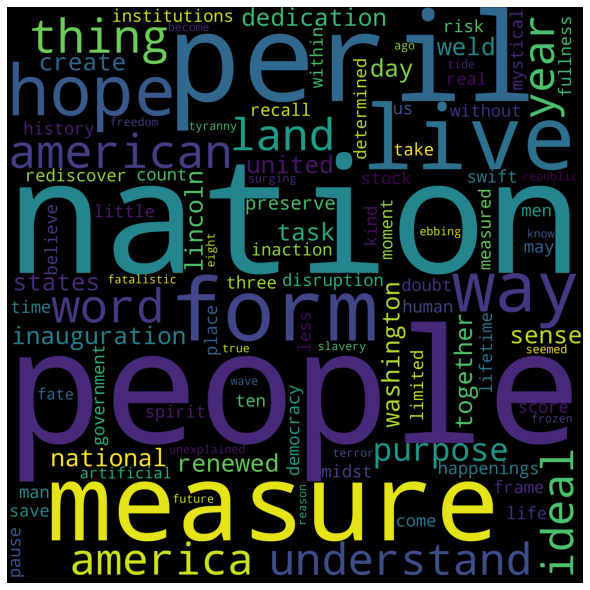

In [297]:
Roosevelt_Word_Cloud = ' '.join(Roosevelt_most_occ_word)
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100,max_words=100 ).generate(Roosevelt_Word_Cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt (after cleaning)!!")
plt.show()

Word Cloud for Kennedy (after cleaning)!!


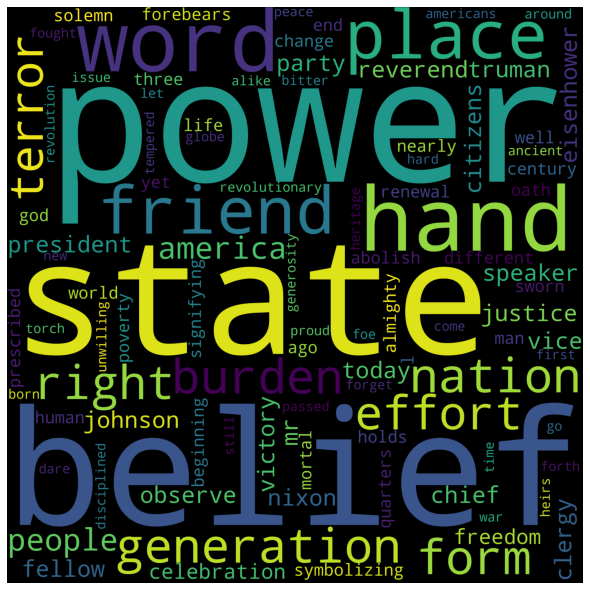

In [298]:
Kennedy_Word_Cloud = ' '.join(Kennedy_most_occ_word)
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100,max_words=100 ).generate(Kennedy_Word_Cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy (after cleaning)!!")
plt.show()


Word Cloud for Nixon (after cleaning)!!


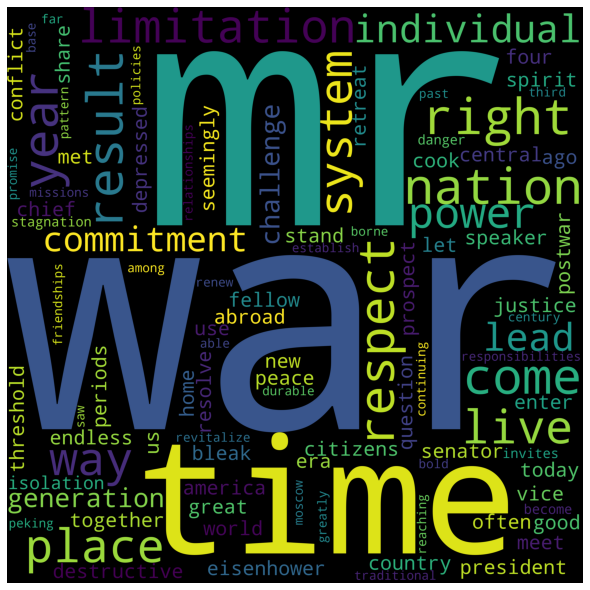

In [299]:
Nixon_Word_Cloud = ' '.join(Nixon_most_occ_word)
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100,max_words=100 ).generate(Nixon_Word_Cloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon (after cleaning)!!")
plt.show()